In [61]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('/Users/praneeltomar/Desktop/Machine Learning/DataSet/Position_Salaries.csv')
X = df.iloc[ : , 1:-1].values
y = df.iloc[ : , -1].values

In [65]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc_X= StandardScaler()

In [69]:
X


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [71]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [73]:
y = y.reshape(len(y), 1)

In [75]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [77]:
X = sc_X.fit_transform(X)

In [79]:
sc_y = StandardScaler()

In [81]:
y = sc_y.fit_transform(y)

In [83]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [85]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [87]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')

In [89]:
regressor.fit(X, y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [91]:
#reverse scalling 
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

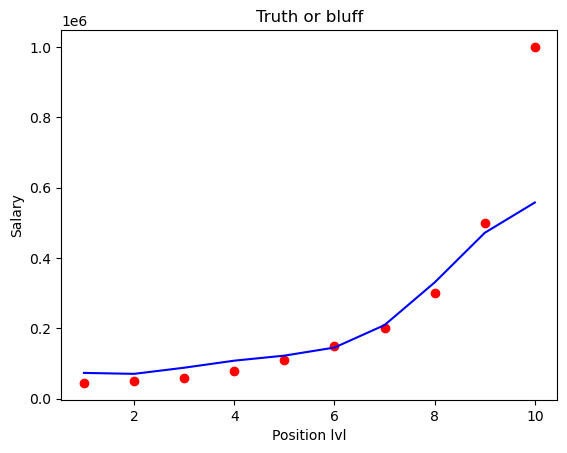

In [95]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title("Truth or bluff")
plt.xlabel("Position lvl")
plt.ylabel("Salary")
plt.show()

/var/folders/mh/w50kcs_s56g_tt80wvs4mtxr0000gn/T/ipykernel_7009/333997826.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


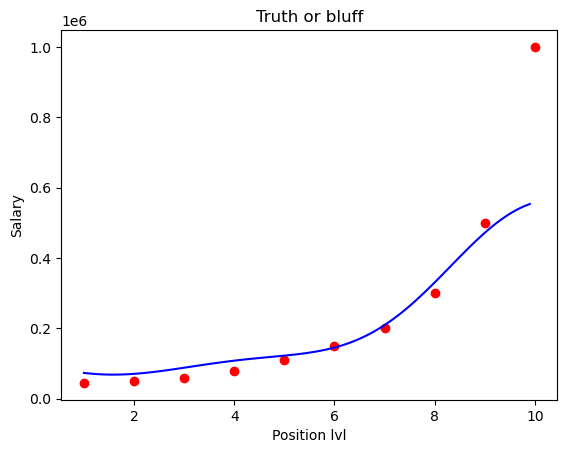

In [97]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title("Truth or bluff")
plt.xlabel("Position lvl")
plt.ylabel("Salary")
plt.show()